# Penguin Data
## Midterm Practice

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# 1.  (1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên
penguins_data = pd.read_csv('./data/penguins-data.csv')

penguins_data.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [67]:
# 2.  (5 điểm) Tìm hiểu thông tin về dữ liệu:
# a. Số lượng chim cánh cụt của mỗi loài
penguins_data.groupby('species').size().reset_index(name='Số lượng').set_index('species').rename_axis('Loài', axis=0).transpose()

Loài,Adelie,Chinstrap,Gentoo
Số lượng,146,68,119


In [68]:
# b.  Số lượng mỗi loài chim cánh cụt trên mỗi đảo
penguins_data.groupby(['species', 'island']).size().unstack().fillna(0).astype(int).rename_axis(None, axis=0).rename_axis(None, axis=1).transpose()

,Adelie,Chinstrap,Gentoo
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [69]:
# c) Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê: giá trị 
# trung  bình,  trung  vị,  độ  lệch  chuẩn  trên  các  thuộc  tính  độ  dài  mỏ 
# (bill_leghth_mm), độ sâu mỏ (bill_depth_mm), độ dài cánh (flipper) và trọng 
# lượng (body_mass).  

chinstrap_info = penguins_data[penguins_data['species'] == 'Chinstrap'][['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe().loc[['mean', '50%', 'std']]
gentoo_info = penguins_data[penguins_data['species'] == 'Gentoo'][['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe().loc[['mean', '50%', 'std']]
adelie_info = penguins_data[penguins_data['species'] == 'Adelie'][['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe().loc[['mean', '50%', 'std']]

pd.concat([adelie_info, gentoo_info, chinstrap_info], keys=['Adelie', 'Gentoo', 'Chinstrap'], axis=1).transpose()

mean      50%         std
Adelie    bill_length_mm       38.823973    38.85    2.662597
          bill_depth_mm        18.347260    18.40    1.219338
          flipper_length_mm   190.102740   190.00    6.521825
          body_mass_g        3706.164384  3700.00  458.620135
Gentoo    bill_length_mm       47.568067    47.40    3.106116
          bill_depth_mm        14.996639    15.00    0.985998
          flipper_length_mm   217.235294   216.00    6.585431
          body_mass_g        5092.436975  5050.00  501.476154
Chinstrap bill_length_mm       48.833824    49.55    3.339256
          bill_depth_mm        18.420588    18.45    1.135395
          flipper_length_mm   195.823529   196.00    7.131894
          body_mass_g        3733.088235  3700.00  384.335081

In [70]:
# d.  Dựa trên kết quả tính được, bạn có rút ra được nhận xét gì không? 
print('Nhận xét: ')
print('Chim cánh cụt Adelie có kích thước nhỏ nhất với giá trị trung bình và trung vị của các thuộc tính đều nhỏ nhất.')
print('Chim cánh cụt Gentoo có kích thước lớn nhất với giá trị trung bình và trung vị của các thuộc tính đều lớn nhất.')
print('Chim cánh cụt Chinstrap có giá trị trung bình và trung vị của các thuộc tính nằm giữa giữa Adelie và Gentoo.')

Nhận xét: 
Chim cánh cụt Adelie có kích thước nhỏ nhất với giá trị trung bình và trung vị của các thuộc tính đều nhỏ nhất.
Chim cánh cụt Gentoo có kích thước lớn nhất với giá trị trung bình và trung vị của các thuộc tính đều lớn nhất.
Chim cánh cụt Chinstrap có giá trị trung bình và trung vị của các thuộc tính nằm giữa giữa Adelie và Gentoo.


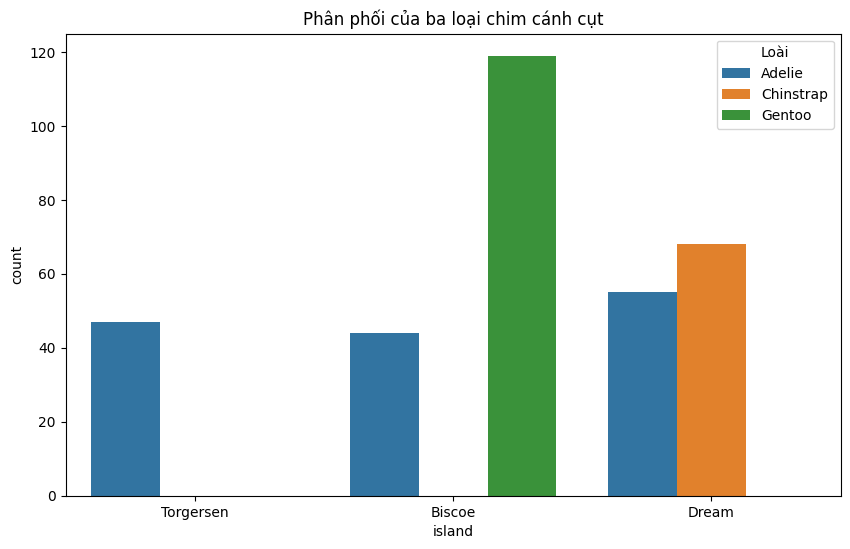

In [71]:
# 3.  (2 điểm) Vẽ đồ thị phù hợp thể hiện phân phối của ba loại chim cánh cụt, qua đó bạn hãy đưa ra bình luận của mình.

plt.figure(figsize=(10,6))
sns.countplot(x='island', hue='species', data=penguins_data)
plt.title('Phân phối của ba loại chim cánh cụt')
plt.legend(title='Loài')
plt.show()

Hệ số tương quan của 2 đại lượng: 0.873
2 đại lượng này có quan hệ tương quan dương với nhau, khi độ dài cánh càng lớn thì trọng lượng càng lớn.


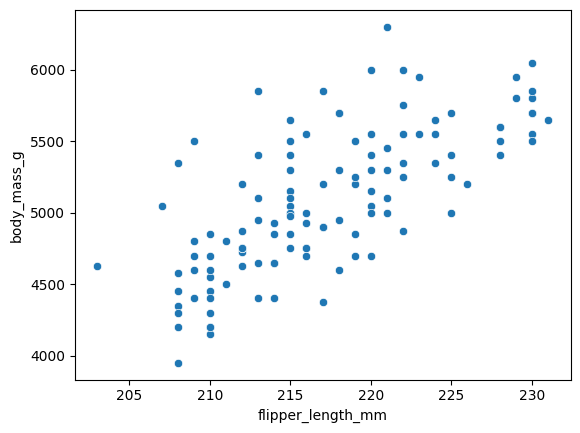

In [81]:
# 4.  (2 điểm) Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo: 
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins_data[penguins_data['species'] == 'Gentoo'])

In [82]:
# a. Theo bạn hai đại lượng này có quan hệ với nhau hay không? Giải thích. 
print('Hệ số tương quan của 2 đại lượng: '+ str(round(penguins_data[['flipper_length_mm', 'body_mass_g']].corr().loc['flipper_length_mm', 'body_mass_g' ], 4)))
print("2 đại lượng này có quan hệ tương quan dương với nhau, khi độ dài cánh càng lớn thì trọng lượng càng lớn.")


Hệ số tương quan của 2 đại lượng: 0.873
2 đại lượng này có quan hệ tương quan dương với nhau, khi độ dài cánh càng lớn thì trọng lượng càng lớn.


Hệ số tương quan của các thuộc tính với trọng lượng của loài chim Gentoo: 

Vậy độ dài mỏ (bill_length_mm) và độ sâu mỏ (bill_depth_mm) cũng có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo.


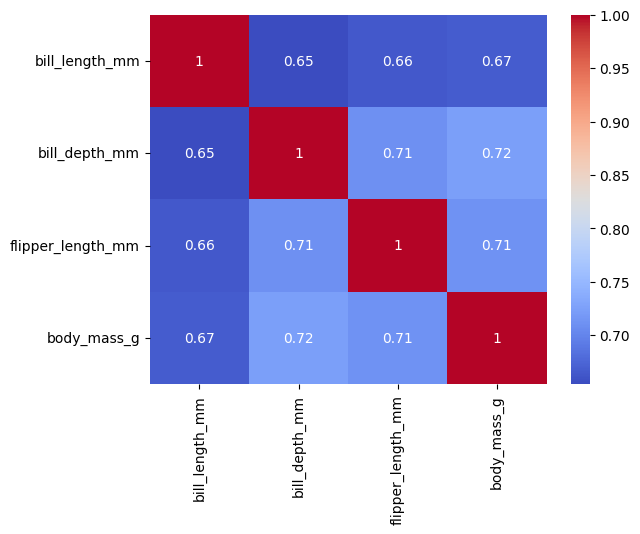

In [96]:
# b. Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo?
print("Hệ số tương quan của các thuộc tính với trọng lượng của loài chim Gentoo: ")
sns.heatmap(penguins_data[penguins_data['species'] == 'Gentoo'][['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr(), annot=True, cmap='coolwarm')
print("\nVậy độ dài mỏ (bill_length_mm) và độ sâu mỏ (bill_depth_mm) cũng có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo.")